## HEART DISEASE

### Import

In [50]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### Data Cleaning

In [2]:
df = pd.read_csv('framingham_heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### Handling NAN

In [6]:
# Seems there is are null values on education, cigsPerDay, toChol, BMI, heartRate, glucose...
# Imputer is used to handle NAN values easily..
imputer = SimpleImputer(missing_values=np.nan, strategy= 'mean')
df = pd.DataFrame(imputer.fit_transform(df), columns= df.columns)

In [7]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   float64
 1   age              4238 non-null   float64
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   float64
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   float64
dtypes: float64(16)
memory usage: 529.9 KB


### Visualization

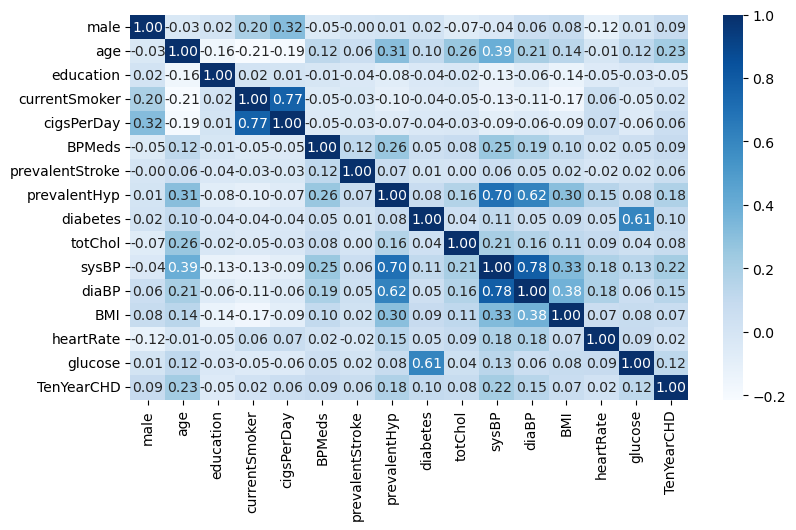

In [10]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot= True,cmap = 'Blues', fmt = '.2f')
plt.show()

`Education, currentSmoker` doen't seem to be creating much impact.
So, lets drop it

In [11]:
df.drop(columns= ['education','currentSmoker'],inplace=True)
df.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [12]:
# Range of values of each columns..
df.describe()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Since, the ranges varies widely, feature scaling should be done...

### Scaling

In [13]:
Y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis=1)

In [14]:
X.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


In [15]:
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153192,-1.234951,-0.757974,-0.175844,-0.077033,-0.671101,-0.162477,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517
1,-0.867158,-0.418257,-0.757974,-0.175844,-0.077033,-0.671101,-0.162477,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311
2,1.153192,-0.184916,0.925835,-0.175844,-0.077033,-0.671101,-0.162477,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078
3,-0.867158,1.331800,1.767740,-0.175844,-0.077033,1.490089,-0.162477,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141
4,-0.867158,-0.418257,1.178407,-0.175844,-0.077033,-0.671101,-0.162477,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840


In [16]:
Y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: TenYearCHD, dtype: float64

### Training

#### Splitting

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [18]:
X_train.shape, X_test.shape

((2966, 13), (1272, 13))

In [19]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

#### Predicting

In [20]:
Y_test_pred = model.predict(X_test)

#### Performance Evaluation

Text(45.722222222222214, 0.5, 'Actual')

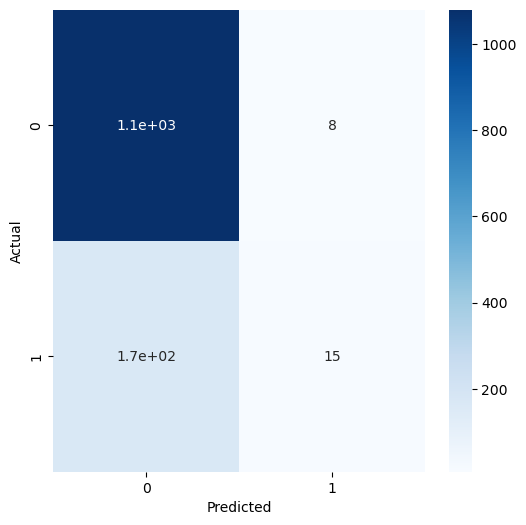

In [25]:
#Confusion matrix
cm = confusion_matrix(Y_test,Y_test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

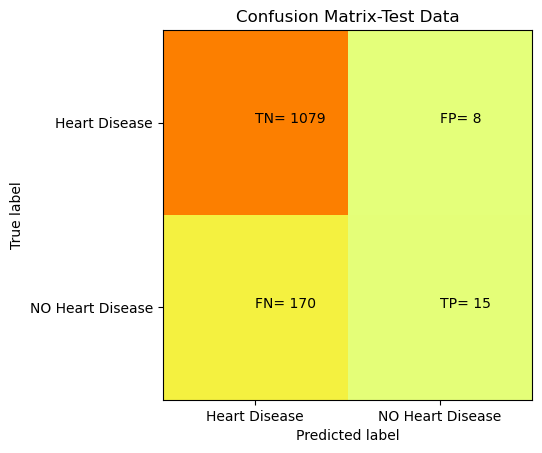

In [49]:
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)

# Creating a list of class names and setting the title, x-label and y-label of the plot
classNames = ['Heart Disease', 'NO Heart Disease']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Setting the ticks and labels for the x and y axes
tick_marks = np.arange(2)
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)

# Adding the values of True Negatives, False Positives, False Negatives and True Positives to the plot
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+"= "+str(cm[i][j]))

# Displaying the plot
plt.show()

Classification Report

In [51]:
print(classification_report(y_true=Y_test,y_pred=Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1087
         1.0       0.65      0.08      0.14       185

    accuracy                           0.86      1272
   macro avg       0.76      0.54      0.53      1272
weighted avg       0.83      0.86      0.81      1272

